# Identification of Wild Chaos

We have the system
$$
f:\mathbb{C}\backslash \{0\}\to\mathbb{C}
$$
$$
z\to \left(1-\lambda+\lambda|z|^a\right) \left(\frac{z}{|z|}\right)^2 + 1
$$
First lets look at plotting the different features of this system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr


tolerence = 1e-1

## Equilibria
There are 3 equilibria in the system. Two of which will be found at the same coords $$q:(x,y) = \left(\frac{1}{2}, \pm\sqrt{\frac{3}{4}}\right)$$
The third equilibrium moves along the line $y=0$ depending on the parameter values. It is the location of this third equilibrium which we now want to compute.

In [2]:
def maping(x,y,l,a):
    """Applies one itteration of the map."""
    z = x + y*1j
    z1 = (1-l+l*np.abs(z)**a)*((z)/(np.abs(z)))**2 + 1
    return np.real(z1), np.imag(z1)

def jacobian(x,y,l,a):
    """Computes the Jacobian of the map."""
    J = np.zeros([*x.shape,2,2])
    
    J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/(x**2+y**2)**2)

    J[...,0,1] = y*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(-2*y/(x**2+y**2) -2*y*(x**2-y**2)/(x**2+y**2)**2)

    J[...,1,0] = 2*y*x**2*a*l*(x**2+y**2)**(a/2-2) + (1-l+l*(x**2+y**2)**(a/2))*(2*y/(x**2+y**2)-4*x**2*y/(x**2+y**2)**2)

    J[...,1,1] = 2*x*y**2*a*l*(x**2+y**2)**(a/2-2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2)-4*y**2*x/(x**2+y**2)**2)
    
    return J

def repeatmap(x,y,l,a,n=1):
    X = np.zeros([n,*x.shape])
    Y = np.zeros([n,*y.shape])
    
    X[0] = x
    Y[0] = y
    
    for i in range(1,int(n)):
        x,y = maping(x,y,l,a)
        X[i] = x
        Y[i] = y
    return X,Y

We can do the computations for a range of x,y,l, and a values.

In [3]:
x = np.arange(-2,2,0.4)
y = np.arange(-2,2,0.4)
l = np.arange(0.5,1,0.05)
a = np.arange(0.5,1,0.05)

x,y,l,a = np.meshgrid(x,y,l,a)

We can find the jacobian for the points as follows

In [4]:
jacob = jacobian(x,y,l,a)

Starting with our known equilibria, we can compute the eigenvalues. Below is a plot of the real part of the first eigenvalue for these equilibria.

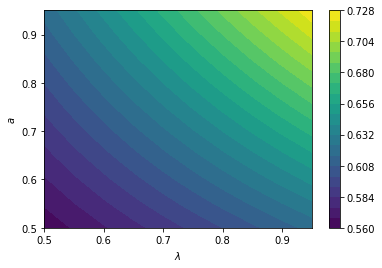

In [5]:
x = np.array([0.5])
y = np.array([np.sqrt(3/4), -np.sqrt(3/4)])
l = np.arange(0.5,1,0.05)
a = np.arange(0.5,1,0.05)
x,y,l,a = np.meshgrid(x,y,l,a)
jacob = jacobian(x,y,l,a)

w,v = np.linalg.eig(jacob)

wreal = np.real(w)
plt.contourf(l[0,0,:,:],a[0,0,:,:],wreal[0,0,:,:,1],levels=20)
# plt.contourf(l[0,0,:,:],a[0,0,:,:],wreal[0,0,:,:,1],cmap = 'hot')
plt.xlabel('$\lambda$')
plt.ylabel('$a$')
plt.colorbar()
plt.show()

Testing for the validity of the map, we can plot the path the map takes from these points for any given x and y.

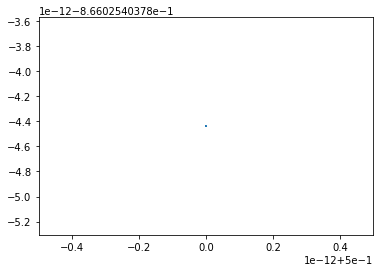

In [6]:
x = np.array([0.5])
y = np.array([np.sqrt(3/4), -np.sqrt(3/4)])
l = np.arange(0.5,1,0.05)
a = np.arange(0.5,1,0.05)
x,y,l,a = np.meshgrid(x,y,l,a)
X,Y = repeatmap(x,y,l,a,n=5000)
plt.plot(X[:,1,0,0,0],Y[:,1,0,0,0])
plt.show()

Let's plot a range of x and y values.

/home/jelleymuncher/anaconda3/envs/chaos/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


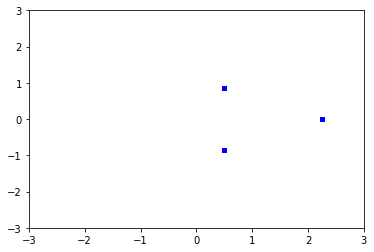

In [7]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

n = 100
x = np.arange(-10,10,0.5)
y = np.arange(-10,10,0.5)
l = np.array([0.5])
a = np.array([0.5])
x,y,l,a = np.meshgrid(x,y,l,a)
X,Y = repeatmap(x,y,l,a,n=n)

# Plotting stuff
# plt.plot(X[:,0,0,0,0],Y[:,0,0,0,0])
# plt.show()
fig = plt.figure() 
ax = plt.axes(xlim=(-3, 3), ylim=(-3, 3)) 
lines = [ax.plot([], [],'bo', markersize = 4) for i in range(len(x))] 
lines = [line[0] for line in lines]

# initialization function 
def init(): 
    # creating an empty plot/frame 
    for line in lines:
        line.set_data([], []) 
    return lines
# animation function 
def animate(i): 
    j=0
    for line in lines:
        # x, y values to be plotted 
        x = X[max(0,i-10):i,j,:,0,0]
        y = Y[max(0,i-10):i,j,:,0,0]

        # appending new points to x, y axes points list 
        line.set_data(x, y) 
        j+=1
    return lines 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=n, interval=200, blit=True)


HTML(anim.to_jshtml())

Now we want to identify the location of the 3rd equilibrium. Luckily we know it is on the x-axis.

In [8]:
def f(x,l,a):
    """Mapping along the xaxis"""
    return x-l*x**a-2+l

def find_p(a,b,l,A,tolerence):
    """find p."""
    while f(a,l,A)*f(b,l,A)>0:
        dist = b-a
        b = b+dist
        a = a-dist
    else:
        p = (a + b)/2;
        err = abs(f(p,l,A));
        while err > tolerence:
            if f(a,l,A)*f(p,l,A)<0:
                b = p;
            else:
                a = p;          
            p = (a + b)/2; 
            err = abs(f(p,l,A));
    return p

/home/jelleymuncher/anaconda3/envs/chaos/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


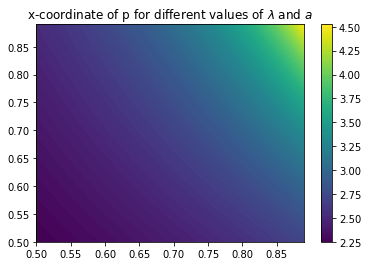

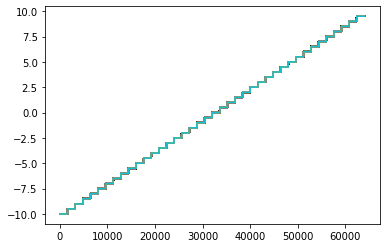

In [9]:
x = np.arange(-10,10,0.5)
y = [0]
l = np.arange(0.5,0.9,0.01)
a = np.arange(0.5,0.9,0.01)

x,y,l,a = np.meshgrid(x,y,l,a)
x = x.flatten()
y = y.flatten()
l = l.flatten()
a = a.flatten()

df = pd.DataFrame(columns = ['x','y','l','a','J00','J01','J10','J11'])
df['x'] = x
df['y'] = y
df['l'] = l
df['a'] = a
# df['y1'] = 0
df = df.where(df.x != np.nan)
out = repeatmap(df.x.values,df.y.values,df.l.values,df.a.values,n=1000)
df.x = out[0][-1]
df.y = out[1][-1]
df = df.drop_duplicates()
df = df[np.isfinite(df['x'])]
subdf = df.pivot_table(index='l', columns='a', values='x')
plt.contourf(subdf.index,subdf.columns,subdf.values,levels = 100)
plt.title('x-coordinate of p for different values of $\lambda$ and $a$')
plt.colorbar()
plt.show()

fig = plt.figure()
X = out[0]
Y = out[1]
for i in range(len(X)):
    x_i = X[i]
    plt.plot(x)

In [10]:
J = jacobian(df.x.values,df.y.values,df.l.values,df.a.values)
J = J.reshape([len(J),4])
df[['J00','J01','J10','J11']] = J
df

,x,y,l,a,J00,J01,J10,J11
0,2.250000,0.0,0.50,0.50,0.166667,0.0,0.0,1.111111
1,2.257369,0.0,0.50,0.51,0.171110,0.0,0.0,1.114013
2,2.264880,0.0,0.50,0.52,0.175611,0.0,0.0,1.116951
3,2.272540,0.0,0.50,0.53,0.180171,0.0,0.0,1.119928
4,2.280353,0.0,0.50,0.54,0.184792,0.0,0.0,1.122943
...,...,...,...,...,...,...,...,...
31133,2.544822,0.0,0.68,0.63,0.303219,0.0,0.0,1.214091
31145,2.786618,0.0,0.68,0.75,0.394731,0.0,0.0,1.282284
31260,2.720628,0.0,0.71,0.70,0.368091,0.0,0.0,1.264876
31767,2.611938,0.0,0.84,0.57,0.316855,0.0,0.0,1.234285


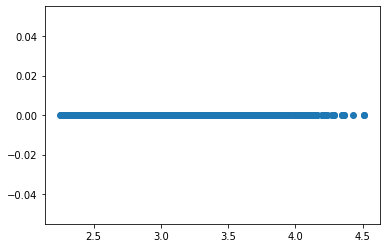

In [12]:
plt.plot(df.x,df.y,'o')